In [43]:
#Import + read df

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc


df = pd.read_csv('train.csv')
df_valid = pd.read_csv('valid.csv')

df


/var/folders/h7/3n282g152_x5l_757w1zr7p00000gn/T/ipykernel_92590/2433275068.py:24: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,14

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


<Axes: >

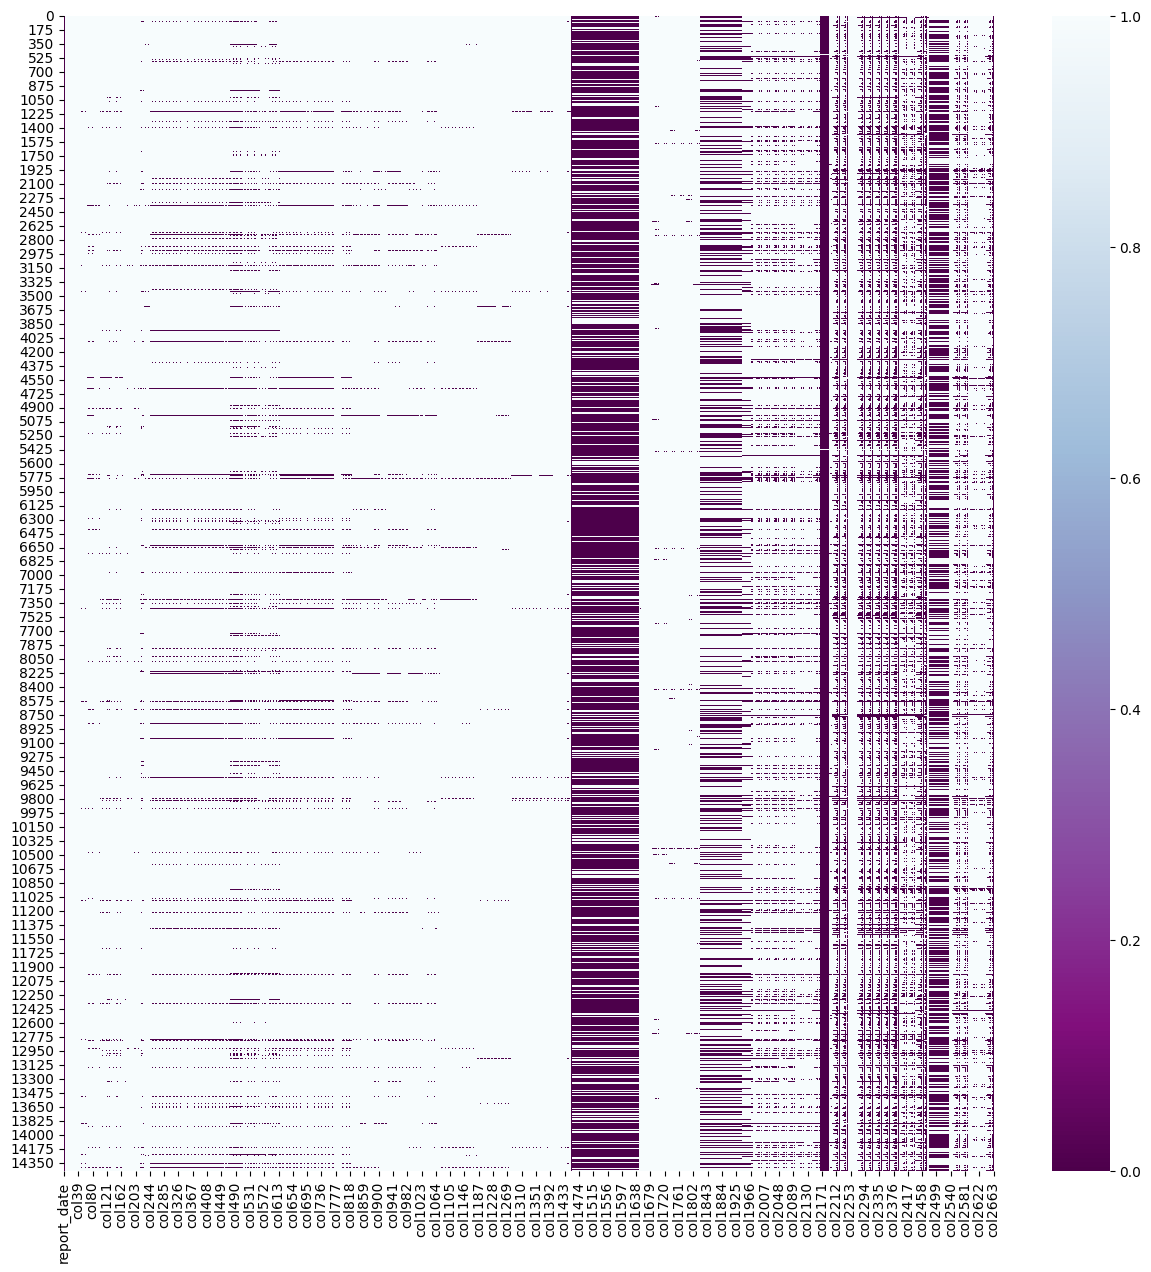

In [44]:
#Проверка пропусков

plt.figure(figsize=(15, 15))  # Устанавливаем размер графика
sns.heatmap(df.isnull(), cmap='BuPu_r')

In [45]:
#Проверка процентов

missing_values = df.isnull().sum()
missing_values

missing_percent = df.isnull().mean() * 100
missing_percent

report_date     0.000000
client_id       0.000000
target          0.000000
col1           99.979247
col2           99.958495
                 ...    
col2659        96.499723
col2660        44.410625
col2661        44.410625
col2662        44.410625
col2663         0.000000
Length: 2666, dtype: float64

In [46]:
#Удаление дубликатов

df = df.drop_duplicates()
df_valid = df_valid.drop_duplicates()
df

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [47]:
#Удаление колонок где пропусков > 80

threshold = 0.8  # 80% пропусков
df = df.loc[:, df.isnull().mean() < threshold]
df_valid = df_valid.loc[:, df_valid.isnull().mean() < threshold]
df

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,0,fc4b5aa0-c4d6-4394-93db-57a1505e66c4,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,0,fcc827d8-b64b-4b59-b718-87f2a51d77a4,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,0,fd5f22f5-36f6-4dca-9896-8c9e90bbb702,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,0,fdf04fb7-5404-4a9c-ae5b-e1e893060631,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [48]:
#Проверка типов

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 539 entries, report_date to col2663
dtypes: float64(534), int64(3), object(2)
memory usage: 59.4+ MB


In [49]:
# Удаление строк с большим количеством пропусков
threshold = 0.5  # 50% пропусков
df = df.dropna(thresh=df.shape[1] * threshold, axis=0)
df_valid = df_valid.dropna(thresh=df_valid.shape[1] * threshold, axis=0)
df

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
3,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,0,07ca8162-5b7d-ed11-b824-005056b89b68,0.0,0.0,1.0,1.0,1.0,...,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
8,2023-01-01,18,0,0,0b08a6bb-42f5-ec11-b822-005056b8a6d9,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446,2022-10-01,8302,0,0,f99a16a8-c0ef-ec11-b822-005056b8a6c4,0.0,0.0,0.0,0.0,1.0,...,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148
14448,2022-08-01,2634,0,0,fb0cd91e-0045-4cc1-8e11-8b867046a94e,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.257017
14450,2022-08-01,1240,0,0,fc11bfba-ee6e-4b7e-9cba-b0f4ebe7abbe,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,0.257789
14453,2022-02-01,7116,1,0,fd5f22f5-36f6-4dca-9896-8c9e90bbb702,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005


In [50]:
#Алгоритм для удаления дубликатов

unique_data_columns = []
duplicated_data_columns = set()

for col in df.columns:
    if not any(df[col].equals(df[other_col]) for other_col in unique_data_columns):
        unique_data_columns.append(col)
    else:
        duplicated_data_columns.add(col)
df = df[unique_data_columns]


unique_data_columns = []
duplicated_data_columns = set()
for col in df_valid.columns:
    if not any(df_valid[col].equals(df_valid[other_col]) for other_col in unique_data_columns):
        unique_data_columns.append(col)
    else:
        duplicated_data_columns.add(col)

# Удаляем дублированные колонки

df_valid = df_valid[unique_data_columns]

# Вывод результата

df_valid

,report_date,client_id,target,col476,col480,col484,col488,col492,col496,col500,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,240.0,240.0,240.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,59.8983,59.5791,59.738701,59.5791,59.579102,30.2618,30.1154,...,360.0,360.0,360.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,348.0,348.0,348.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,0.257217
4,2023-03-01,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,362.0,362.0,362.0,NaN,NaN,NaN,10391000.0,10391000.0,10391000.0,0.257348
5,2023-05-01,15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,240.0,240.0,240.0,NaN,NaN,NaN,8436000.0,8436000.0,8436000.0,0.256718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636,2023-03-01,3435,0,59.8983,45.0355,49.989766,45.0355,45.035500,38.9750,30.2618,...,360.0,360.0,360.0,7361000.0,7361000.0,7361000.0,7361000.0,7361000.0,7361000.0,0.258811
3637,2023-04-01,4366,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,360.0,360.0,360.0,NaN,NaN,NaN,3500000.0,3500000.0,3500000.0,0.256261
3639,2023-03-01,835,0,55.7483,55.7483,55.748299,55.7483,55.748299,37.6171,37.6171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256919
3640,2023-03-01,8300,0,56.2582,55.7483,56.156221,56.2582,56.258202,37.9878,37.6171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257217


In [51]:
# удаление колонки с непонятным значением
column_to_drop = 'col1454'
df = df.drop(columns=column_to_drop)
df_valid = df_valid.drop(columns=column_to_drop)
df

,report_date,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
1,2022-11-01,5,0,1,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
3,2022-09-01,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,0.0,0.0,0.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,0,0.0,0.0,1.0,1.0,1.0,1.0,...,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
8,2023-01-01,18,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446,2022-10-01,8302,0,0,0.0,0.0,0.0,0.0,1.0,1.0,...,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148
14448,2022-08-01,2634,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.257017
14450,2022-08-01,1240,0,0,0.0,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,0.257789
14453,2022-02-01,7116,1,0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005


In [52]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9595 entries, 1 to 14455
Columns: 309 entries, report_date to col2663
dtypes: float64(305), int64(3), object(1)
memory usage: 22.7+ MB


In [53]:
#смотрим что за колонка с объектом

object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['report_date'], dtype='object')

In [54]:
# column_to_check = 'client_id'

# # Удаление строк с дублированными значениями в указанной колонке
# df = df.drop_duplicates(subset=[column_to_check], keep=False)
df

,report_date,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
1,2022-11-01,5,0,1,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
3,2022-09-01,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,0.0,0.0,0.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,0,0.0,0.0,1.0,1.0,1.0,1.0,...,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
8,2023-01-01,18,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446,2022-10-01,8302,0,0,0.0,0.0,0.0,0.0,1.0,1.0,...,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148
14448,2022-08-01,2634,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.257017
14450,2022-08-01,1240,0,0,0.0,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,0.257789
14453,2022-02-01,7116,1,0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005


In [55]:
df['col1460'].unique()

array([ 1.,  4.,  2.,  3., nan,  0.,  7., 13.,  5.,  6., 10., 19., 12.,
        8.,  9., 17., 20., 11.])

In [56]:
#Проверка на процент пропусков
missing_percent = df.isnull().mean() * 100
missing_percent > 80

report_date    False
client_id      False
target         False
col1453        False
col1455        False
               ...  
col2656        False
col2660        False
col2661        False
col2662        False
col2663        False
Length: 309, dtype: bool

In [57]:
#Удаление одинаковых столбцов
df = df.loc[:, df.nunique() > 1]
df_valid = df_valid.loc[:, df_valid.nunique() > 1]
df

,report_date,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
1,2022-11-01,5,0,1,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
3,2022-09-01,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,0,0.0,0.0,0.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,0,0.0,0.0,1.0,1.0,1.0,1.0,...,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
8,2023-01-01,18,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446,2022-10-01,8302,0,0,0.0,0.0,0.0,0.0,1.0,1.0,...,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148
14448,2022-08-01,2634,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.257017
14450,2022-08-01,1240,0,0,0.0,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,0.257789
14453,2022-02-01,7116,1,0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005


In [58]:
#Запеняем пустные и неномерные на Nan
df_valid = df_valid.apply(pd.to_numeric, errors='coerce')
df = df.apply(pd.to_numeric, errors='coerce')

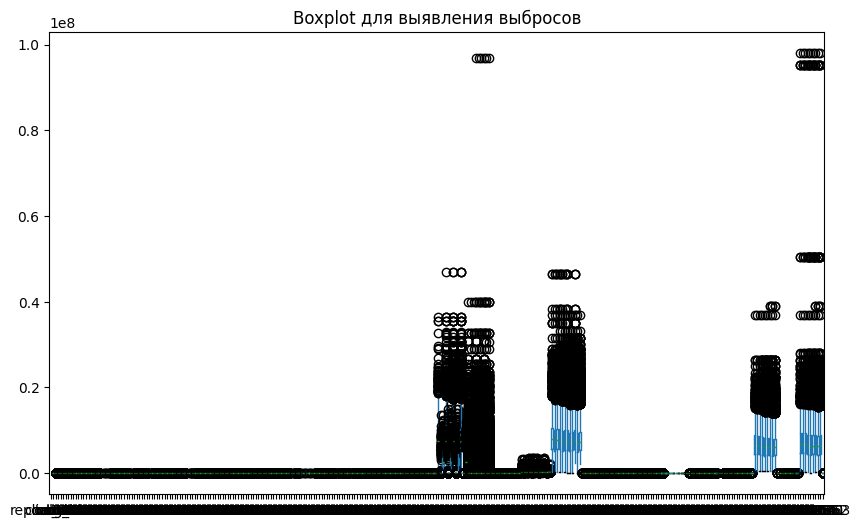

In [59]:
#Проверка выбросов и вывод графика

def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)  # Первый квартиль (25%)
    Q3 = column.quantile(0.75)  # Третий квартиль (75%)
    IQR = Q3 - Q1  # Межквартильный размах
    lower_bound = Q1 - 1.5 * IQR  # Нижняя граница
    upper_bound = Q3 + 1.5 * IQR  # Верхняя граница
    # Выявление выбросов
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Применение функции к каждой колонке
outliers_dict = {}
for col in df.columns:
    outliers = detect_outliers_iqr(df[col])
    if not outliers.empty:
        outliers_dict[col] = outliers

outliers_dict = {}
for col in df_valid.columns:
    outliers = detect_outliers_iqr(df_valid[col])
    if not outliers.empty:
        outliers_dict[col] = outliers

# Вывод выбросов
# print("Выбросы в датасете:")
# for col, outliers in outliers_dict.items():
#     # print(f"Колонка '{col}': {outliers.tolist()}")

# Визуализация выбросов с использованием boxplot
plt.figure(figsize=(10, 6))
df.boxplot(grid=False)
plt.title('Boxplot для выявления выбросов')
plt.show()

In [60]:
# замена медианой если ненорм распределение, если норм, то средним

import scipy.stats as st

# Identify numerical columns and filter out columns with all NaNs
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols = [col for col in numerical_cols if df[col].count() > 0]

# Handle string values in numerical columns
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop columns with all NaNs
df = df.dropna(axis=1, how='all')

# Iterate over each numerical column
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        data = df[col].dropna()
        if len(data) >= 3:
            stat, p = st.shapiro(data)
            alpha = 0.05
            if p > alpha:
                # Data is approximately normally distributed
                fill_value = data.mean()
                df[col].fillna(fill_value, inplace=True)

            else:
                # Data is not normally distributed
                q1 = data.quantile(0.25)
                q3 = data.quantile(0.75)
                iqr = q3 - q1
                lower_fence = q1 - 1.5 * iqr
                upper_fence = q3 + 1.5 * iqr
                outliers = data[(data < lower_fence) | (data > upper_fence)]
                skew = data.skew()
                if not outliers.empty and abs(skew) > 0.5:
                    # Data has outliers and is asymmetric
                    fill_value = data.median()
                    df[col].fillna(fill_value, inplace=True)

                else:
                    # Data is not normal but may be symmetric without significant outliers
                    fill_value = data.mean()
                    df[col].fillna(fill_value, inplace=True)

        else:
            # Not enough data to perform Shapiro-Wilk test
            # Fill missing values with median
            fill_value = data.median()
            df[col].fillna(fill_value, inplace=True)


df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9254.
  res = hypotest_fun_out(*samples, **kwds)
/var/folders/h7/3n282g152_x5l_757w1zr7p00000gn/T/ipykernel_92590/1658772769.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(fill_value, inplace=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis

,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,col1461,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
1,5,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,6800000.0,6694442.0,6780769.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
3,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6800000.0,6694442.0,6780769.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.258682
4,8,0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,6800000.0,6694442.0,6780769.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.254164
5,10,0,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
8,18,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,6800000.0,6694442.0,6780769.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.266285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446,8302,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148
14448,2634,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,6800000.0,6694442.0,6780769.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.257017
14450,1240,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,6800000.0,6694442.0,6780769.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,0.257789
14453,7116,1,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6800000.0,6694442.0,6780769.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.260005


In [61]:

numerical_cols = df_valid.select_dtypes(include=[np.number]).columns
numerical_cols = [col for col in numerical_cols if df_valid[col].count() > 0]

for col in numerical_cols:
    df_valid[col] = pd.to_numeric(df_valid[col], errors='coerce')

df_valid = df_valid.dropna(axis=1, how='all')

for col in numerical_cols:
    if df_valid[col].isnull().sum() > 0:
        data = df_valid[col].dropna()
        if len(data) >= 3:
            stat, p = st.shapiro(data)
            alpha = 0.05
            if p > alpha:

                fill_value = data.mean()
                df_valid[col].fillna(fill_value, inplace=True)

            else:

                q1 = data.quantile(0.25)
                q3 = data.quantile(0.75)
                iqr = q3 - q1
                lower_fence = q1 - 1.5 * iqr
                upper_fence = q3 + 1.5 * iqr
                outliers = data[(data < lower_fence) | (data > upper_fence)]
                skew = data.skew()
                if not outliers.empty and abs(skew) > 0.5:
                    fill_value = data.median()
                    df_valid[col].fillna(fill_value, inplace=True)

                else:

                    fill_value = data.mean()
                    df_valid[col].fillna(fill_value, inplace=True)

        else:

            fill_value = data.median()
            df_valid[col].fillna(fill_value, inplace=True)
df_valid


/var/folders/h7/3n282g152_x5l_757w1zr7p00000gn/T/ipykernel_92590/1139363061.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_valid[col].fillna(fill_value, inplace=True)
/var/folders/h7/3n282g152_x5l_757w1zr7p00000gn/T/ipykernel_92590/1139363061.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

,client_id,target,col476,col480,col484,col488,col492,col496,col500,col504,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2,0,59.8983,55.7483,56.104900,55.7483,55.748299,37.6171,33.866867,35.655685,...,240.0,240.0,240.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,0.256919
1,4,0,59.8983,59.5791,59.738701,59.5791,59.579102,30.2618,30.115400,30.188601,...,360.0,360.0,360.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,0.267221
2,9,0,59.8983,55.7483,56.104900,55.7483,55.748299,37.6171,33.866867,35.655685,...,348.0,348.0,348.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,0.257217
4,14,0,59.8983,55.7483,56.104900,55.7483,55.748299,37.6171,33.866867,35.655685,...,362.0,362.0,362.0,7737230.5,7603419.5,7687750.0,10391000.0,10391000.0,10391000.0,0.257348
5,15,0,59.8983,55.7483,56.104900,55.7483,55.748299,37.6171,33.866867,35.655685,...,240.0,240.0,240.0,7737230.5,7603419.5,7687750.0,8436000.0,8436000.0,8436000.0,0.256718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636,3435,0,59.8983,45.0355,49.989766,45.0355,45.035500,38.9750,30.261800,36.070599,...,360.0,360.0,360.0,7361000.0,7361000.0,7361000.0,7361000.0,7361000.0,7361000.0,0.258811
3637,4366,0,59.8983,55.7483,56.104900,55.7483,55.748299,37.6171,33.866867,35.655685,...,360.0,360.0,360.0,7737230.5,7603419.5,7687750.0,3500000.0,3500000.0,3500000.0,0.256261
3639,835,0,55.7483,55.7483,55.748299,55.7483,55.748299,37.6171,37.617100,37.617100,...,300.0,300.0,300.0,7737230.5,7603419.5,7687750.0,6841532.0,6600000.0,6733329.5,0.256919
3640,8300,0,56.2582,55.7483,56.156221,56.2582,56.258202,37.9878,37.617100,37.913660,...,300.0,300.0,300.0,7737230.5,7603419.5,7687750.0,6841532.0,6600000.0,6733329.5,0.257217


In [62]:
# df.describe()
df_valid.describe()

,client_id,target,col476,col480,col484,col488,col492,col496,col500,col504,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
count,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,3042.000000,...,3042.000000,3042.000000,3042.000000,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3.042000e+03,3042.000000
mean,3405.156476,0.019066,59.265460,55.481190,56.185648,55.926882,55.935970,38.685744,33.866867,36.276390,...,290.647600,287.965483,289.320721,7.979859e+06,7.852461e+06,7.927967e+06,7.363426e+06,7.188348e+06,7.278878e+06,0.261756
std,2187.616712,0.136781,2.377984,3.937608,2.715680,3.026851,3.149925,12.013172,11.745804,10.329914,...,69.655535,70.181292,69.369794,2.925148e+06,2.913488e+06,2.910743e+06,3.952308e+06,3.919975e+06,3.917440e+06,0.012490
min,2.000000,0.000000,22.290800,-8.650700,-3.810464,-6.172800,-6.172800,-80.182700,-97.822000,-80.182701,...,24.000000,24.000000,24.000000,3.825000e+05,3.825000e+05,3.825000e+05,3.825000e+05,1.910000e+05,3.825000e+05,0.230229
25%,1482.250000,0.000000,59.898300,55.748300,56.104900,55.748300,55.748299,37.617100,33.866867,35.655685,...,240.000000,240.000000,240.000000,7.737230e+06,7.603420e+06,7.687750e+06,5.232750e+06,5.193038e+06,5.220700e+06,0.256261
50%,3229.000000,0.000000,59.898300,55.748300,56.104900,55.748300,55.748299,37.617100,33.866867,35.655685,...,300.000000,300.000000,300.000000,7.737230e+06,7.603420e+06,7.687750e+06,6.841532e+06,6.600000e+06,6.733330e+06,0.257217
75%,5106.750000,0.000000,59.898300,55.748300,56.104900,55.748300,55.748299,37.617100,33.866867,35.655685,...,360.000000,360.000000,360.000000,7.737230e+06,7.603420e+06,7.687750e+06,8.700000e+06,8.399240e+06,8.520017e+06,0.261701
max,8300.000000,1.000000,69.357200,69.344400,69.344398,69.344400,69.344398,158.645600,142.746500,142.815770,...,420.000000,420.000000,420.000000,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,9.800000e+07,0.341732


In [63]:

common_columns = df.columns.intersection(df_valid.columns)

# Выбираем только общие колонки в обоих датафреймах
df = df[common_columns]
df_valid = df_valid[common_columns]

df

,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,col1461,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
1,5,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,362.0,362.000000,362.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
3,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,242.0,270.644559,242.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.258682
4,8,0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,242.0,270.644559,242.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.254164
5,10,0,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,362.0,362.000000,362.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
8,18,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,242.0,270.644559,242.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.266285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446,8302,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,360.0,360.000000,360.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148
14448,2634,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,348.0,348.000000,348.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.257017
14450,1240,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,240.0,240.000000,240.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,0.257789
14453,7116,1,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,242.0,270.644559,242.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.260005


In [64]:
#Проверка пропусков

null_columns = df.columns[df.isnull().any()].tolist()
if null_columns:
    print(f"Столбцы с пропусками: {null_columns}")
else:
    print("Пропусков нет ни в одном столбце.")

Пропусков нет ни в одном столбце.


<Axes: >

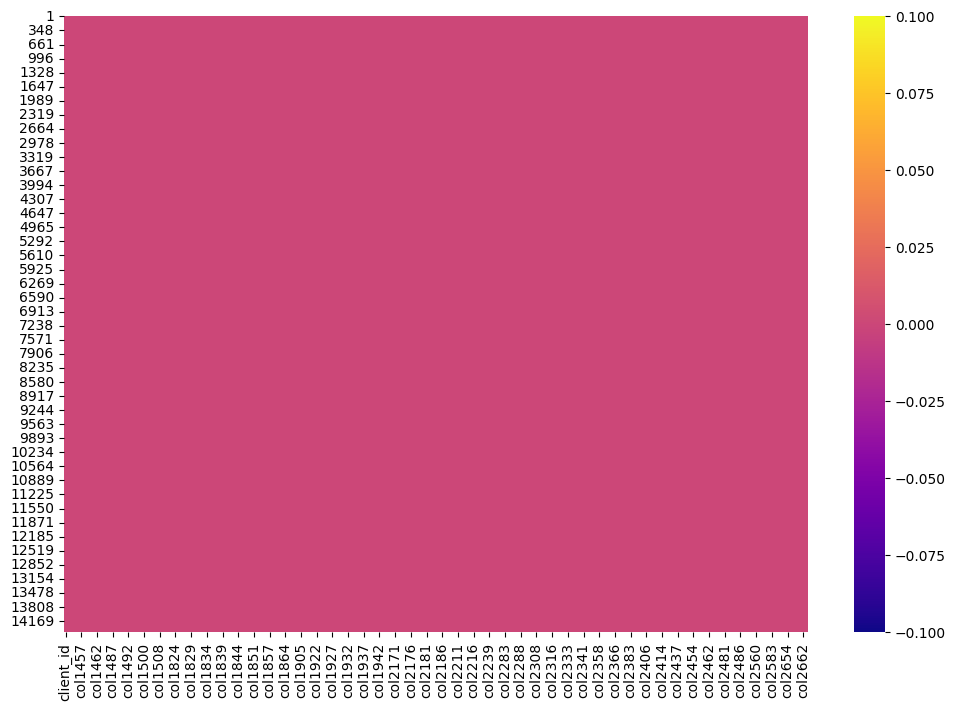

In [65]:
#Вывод хитмапы

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='plasma')

In [66]:
# дропаем таргет

X = df.drop('target', axis=1)
y = df['target']

x1 = df_valid.drop('target', axis = 1)
y1 = df_valid['target']

df

,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,col1461,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
1,5,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,362.0,362.000000,362.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
3,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,242.0,270.644559,242.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.258682
4,8,0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,242.0,270.644559,242.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.254164
5,10,0,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,362.0,362.000000,362.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
8,18,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,242.0,270.644559,242.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.266285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446,8302,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,360.0,360.000000,360.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148
14448,2634,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,348.0,348.000000,348.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.257017
14450,1240,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,240.0,240.000000,240.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,0.257789
14453,7116,1,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,242.0,270.644559,242.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.260005


In [67]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #разделие на тестовую и обучающую выборку

In [68]:
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

In [69]:
# y_probs = model.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

# # Оценка AUC-ROC
# auc_roc = roc_auc_score(y_test, y_probs)
# print(f'AUC-ROC: {auc_roc}')

In [70]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 5, 10, 15]
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# # Обучаем модель с GridSearchCV
# grid_search.fit(X_train, y_train)

# # Выводим лучшие параметры и лучший результат
# print("Лучшие параметры:", grid_search.best_params_)
# print("Лучший результат:", grid_search.best_score_)

In [71]:
# better_model = RandomForestClassifier(**grid_search.best_params_)
# better_model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# y_prob = model.predict_proba(X_test)[:, 1]
# # Оценка AUC-ROC
# auc_roc = roc_auc_score(y_test, y_probs)

# print(f'AUC-ROC: {auc_roc}')
# accuracy = accuracy_score(y_test, y_pred)
# print("Точность:", accuracy)

# print(classification_report(y_test, y_pred))
# conf_matrix = confusion_matrix(y_test, y_pred)

In [72]:
# y.value_counts()

In [73]:
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Не целевая', 'Целевая'], yticklabels=['Не целевая', 'Целевая'])
# plt.ylabel('Фактический класс')
# plt.xlabel('Предсказанный класс')
# plt.title('Матрица ошибок')
# plt.show()

# from imblearn.over_sampling import SMOTE


# smote = SMOTE(random_state=42)
# X_balanced, y_balanced = smote.fit_resample(X, y)


# X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# #обучение
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Предсказание вероятностей для тестовой выборки
# y_pred_proba = model.predict_proba(X_test)[:, 1]

# # Вычисление ROC-AUC
# fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
# roc_auc = auc(fpr, tpr)


# y_pred_proba = model.predict_proba(X_test)[:, 1]

# # Вычисление ROC-AUC
# fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
# roc_auc = auc(fpr, tpr)

# # Построение ROC-AUC кривой
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()

In [74]:
# fpr, tpr, _ = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='green', lw=2, label='ROC-кривая (AUC = {:.2f})'.format(roc_auc))
# plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('Ложноположительный процент')
# plt.ylabel('Истинноположительный процент')
# plt.title('ROC-кривая')
# plt.legend(loc='lower right')
# plt.show()

In [75]:
# from imblearn.under_sampling import RandomUnderSampler #Случайное понижение выборки

# # Инициализация объекта
# undersampler = RandomUnderSampler(random_state=42)

# # Применение понижения выборки
# X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# model = RandomForestClassifier(random_state=42)
# model.fit(X_train_resampled, y_train_resampled)

# # Предсказание на тестовой выборке
# y_pred = model.predict(X_test)

# # Оценка производительности модели
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

In [76]:
class_1 = df[df['target'] == 1]  # Все строки с target = 1
class_0 = df[df['target'] == 0]  # Все строки с target = 0

# Выбор случайных 250 строк из класса 0
class_0_sampled = class_0.sample(n=250, random_state=42)  # random_state для воспроизводимости

# Объединение классов 1 и выбранных строк класса 0
balanced_data = pd.concat([class_1, class_0_sampled])

# Перемешивание данных, чтобы строки не шли подряд
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_data

,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,col1461,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,4130,0,1,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,60.0,60.000000,60.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.274068
1,2453,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,170.0,170.000000,170.0,6421782.5,6317500.0,6400000.0,7263105.0,7263105.0,7263105.0,0.262044
2,5141,0,0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,...,360.0,360.000000,360.0,8300000.0,8300000.0,8300000.0,8300000.0,8300000.0,8300000.0,0.264822
3,3014,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,360.0,360.000000,360.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.258966
4,2412,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,240.0,240.000000,240.0,2500000.0,2500000.0,2500000.0,2500000.0,2500000.0,2500000.0,0.256919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5694,1,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,216.0,216.000000,216.0,7195200.0,7195200.0,7195200.0,7195200.0,7195200.0,7195200.0,0.258208
496,7350,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,362.0,362.000000,362.0,6840000.0,6840000.0,6840000.0,6840000.0,6840000.0,6840000.0,0.256061
497,2375,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,240.0,240.000000,240.0,6994000.0,6994000.0,6994000.0,6994000.0,6994000.0,6994000.0,0.256919
498,3471,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,242.0,270.644559,242.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.257258


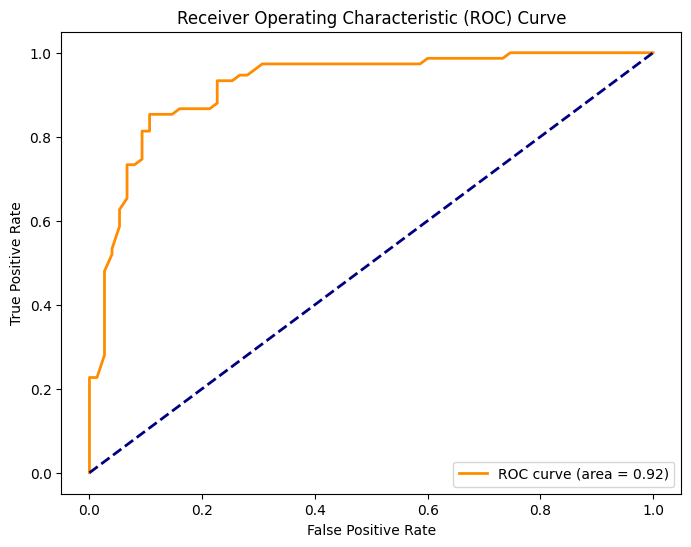

In [77]:


# Разделение данных на признаки (X) и целевую переменную (y)
X = balanced_data.drop('target', axis=1)  # Признаки
y = balanced_data['target']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели RandomForestClassifier
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)

# Предсказание вероятностей для тестовой выборки
y_pred_proba = model1.predict_proba(X_test)[:, 1]

# Вычисление ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Построение ROC-AUC кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [78]:
from sklearn.metrics import (
    roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

# Предсказание для тестовой выборки
y_pred = model1.predict(X_test)
y_pred_proba = model1.predict_proba(X_test)[:, 1]

# Вычисление метрик производительности
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Вывод метрик
# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1-score: {f1:.4f}")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.72      0.81        75
           1       0.77      0.95      0.85        75

    accuracy                           0.83       150
   macro avg       0.85      0.83      0.83       150
weighted avg       0.85      0.83      0.83       150



In [79]:
conf_matrix

array([[54, 21],
       [ 4, 71]])

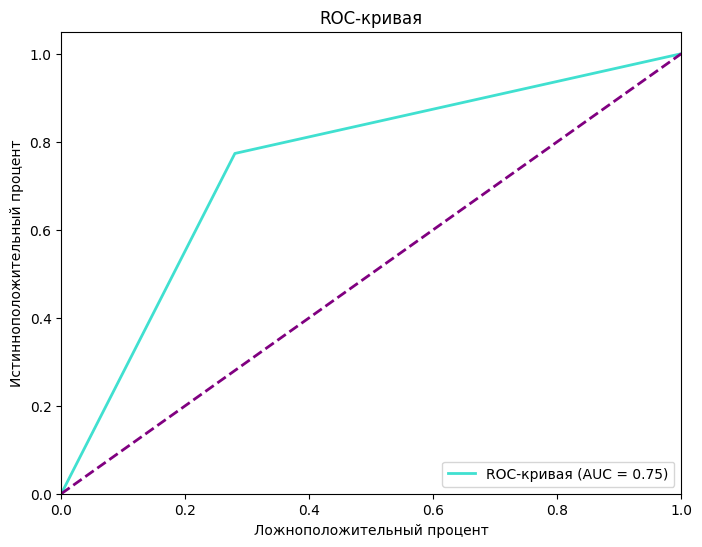

Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.72      0.81        75
           1       0.77      0.95      0.85        75

    accuracy                           0.83       150
   macro avg       0.85      0.83      0.83       150
weighted avg       0.85      0.83      0.83       150



In [80]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)
y_prob = model2.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='turquoise', lw=2, label='ROC-кривая (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='purple', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительный процент')
plt.ylabel('Истинноположительный процент')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

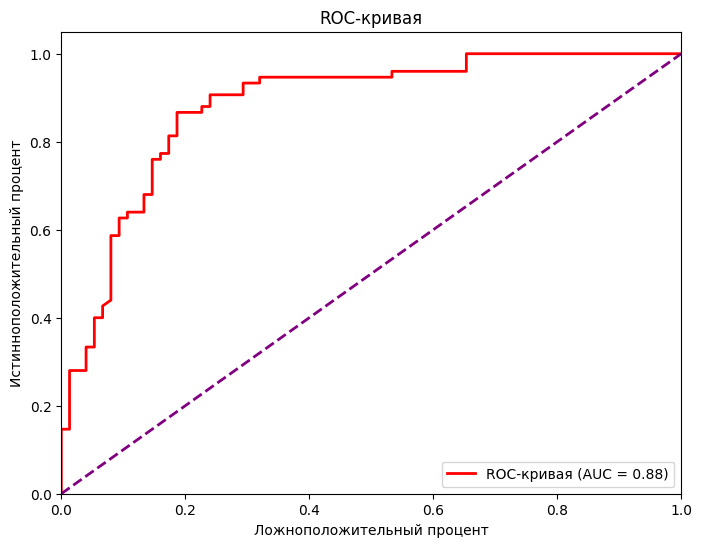

Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.72      0.81        75
           1       0.77      0.95      0.85        75

    accuracy                           0.83       150
   macro avg       0.85      0.83      0.83       150
weighted avg       0.85      0.83      0.83       150



In [81]:
from sklearn.ensemble import GradientBoostingClassifier

model3 =  GradientBoostingClassifier(random_state=42)
model3.fit(X_train, y_train)
y_prob = model3.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC-кривая (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='purple', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительный процент')
plt.ylabel('Истинноположительный процент')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [82]:
df_valid

,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,col1461,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,240.0,240.0,240.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,0.256919
1,4,0,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,360.0,360.0,360.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,0.267221
2,9,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,348.0,348.0,348.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,0.257217
4,14,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,7737230.5,7603419.5,7687750.0,10391000.0,10391000.0,10391000.0,0.257348
5,15,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,240.0,240.0,240.0,7737230.5,7603419.5,7687750.0,8436000.0,8436000.0,8436000.0,0.256718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636,3435,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,360.0,360.0,360.0,7361000.0,7361000.0,7361000.0,7361000.0,7361000.0,7361000.0,0.258811
3637,4366,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,360.0,360.0,360.0,7737230.5,7603419.5,7687750.0,3500000.0,3500000.0,3500000.0,0.256261
3639,835,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,300.0,300.0,300.0,7737230.5,7603419.5,7687750.0,6841532.0,6600000.0,6733329.5,0.256919
3640,8300,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,300.0,300.0,300.0,7737230.5,7603419.5,7687750.0,6841532.0,6600000.0,6733329.5,0.257217


In [83]:
df

,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,col1461,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
1,5,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,362.0,362.000000,362.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
3,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,242.0,270.644559,242.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.258682
4,8,0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,242.0,270.644559,242.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.254164
5,10,0,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,362.0,362.000000,362.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,10850000.0,0.318994
8,18,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,242.0,270.644559,242.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.266285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14446,8302,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,360.0,360.000000,360.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,8577000.0,0.280148
14448,2634,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,348.0,348.000000,348.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,12000000.0,0.257017
14450,1240,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,240.0,240.000000,240.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,10145000.0,0.257789
14453,7116,1,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,242.0,270.644559,242.0,6421782.5,6317500.0,6400000.0,6375000.0,6244578.0,6320000.0,0.260005


In [84]:
X_valid = df_valid.drop('target', axis=1)
y_valid = df_valid['target']

# Применить модель model1 к данным
predictions = model1.predict(X_valid)

# Создать DataFrame с предсказаниями
submission_valid = pd.DataFrame({
  'client_id': df_valid['client_id'],
  'score': predictions
})

print("Accuracy:", accuracy_score(y_valid, predictions))
print("Precision:", precision_score(y_valid, predictions, average='weighted'))
print("Recall:", recall_score(y_valid, predictions, average='weighted'))
print("F1 Score:", f1_score(y_valid, predictions, average='weighted'))

# Сохранить предсказания в новый CSV-файл
submission_valid.to_csv('submissions_valid.csv', index=False)

Accuracy: 0.8113083497698882
Precision: 0.974149832116865
Recall: 0.8113083497698882
F1 Score: 0.8795456953164832
